**Analisis y procesamiento de los datos de espectro recolectados**

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.constants import h, c, k
import scipy.signal


#Funcion para lectura de los espectros 
def open_espec(route, mode = 'r'):
    """
    route : ruta del archivo del espectro type(string)
    mode : predefinido read (r)
    """
    arc = open(route, mode)
    l = arc.readlines()
    espec = []
    for i in np.arange(len(l)):
        t = np.fromstring(l[i], dtype = int, sep = " ")
        espec.append(t)
    
    return espec

#Funcion para el descarte de datos saturados y anomalos

def clean(esp, tol):
    """
    Eliminación de los espectros saturados y al inicio de la medición
    tol : entre 100 y 200
    """
    ESP = []
 
    for i in range(len(esp)-1):
        if abs(max(esp[i])-max(esp[i+1])) <= tol:
            ESP.append(esp[i])
    
    return np.array(ESP)

vect_clean = np.vectorize(clean)

def mean_esp(ESP):

    E = []
    for i in range(len(ESP)):
        M = sum(ESP[i])/len(ESP[i])
        E.append(M)
    
    return E
    

        

In [83]:
#Cargue de Archivos

#MUUA
data = np.array([np.array([open_espec('esp_data\esp_X31_23_05_2023__12_14_00_bosqueplaza.txt', 'r')], dtype = 'object')[0],
              np.array([open_espec('esp_data\esp_X53__23_05_2023__14_59_15_picacho.txt', 'r')], dtype = 'object')[0],
                np.array([open_espec('esp_data\esp_X50__24_05_2023__13_34_35_muua.txt', 'r')], dtype = 'object')[0],
                np.array([open_espec('esp_data\esp_X77__31_05_2023__12_26_56_muua2.txt', 'r')], dtype = 'object')[0],
                np.array([open_espec('esp_data\esp_X75__02_06_2023__14_23_06_barrientos.txt', 'r')], dtype = 'object')[0],
                np.array([open_espec('esp_data\esp_X65__04_06_2023__15_04_17_casa1.txt', 'r')], dtype = 'object')[0],
                np.array([open_espec('esp_data\esp_X62__06_06_2023__14_32_55_barrientoss1.txt', 'r')], dtype = 'object')[0],
                ])

names = ['23_05_a', '23_05_b', '24_05', '31_05', '02_06', '04_06', '06_06']

#Extraterrestrial_Solar_Spectrum
solar_ref_ext = pd.read_excel('WMO_Wehrli_ref_solar_spectra_AM0.xls', header=0)
solar_ref_ext.columns = ['wv', 'extrater']

#Surface_Solar_Spectrum
solar_ref_sfc = pd.read_excel('ASTM G173-03_Ref_Solar_spectra_AM1.5.xls', header = 0)
solar_ref_sfc.columns = ['wv', 'etr', 'global', 'circumsolar']

#Wavelenght for Espectral_data
N = 288
wv = np.arange(N)*2.3548+321.47

#Limpieza de los datos
esp = mean_esp(vect_clean(data, 100))

C:\Users\User\AppData\Local\Temp/ipykernel_9668/268121116.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([np.array([open_espec('esp_data\esp_X31_23_05_2023__12_14_00_bosqueplaza.txt', 'r')], dtype = 'object')[0],


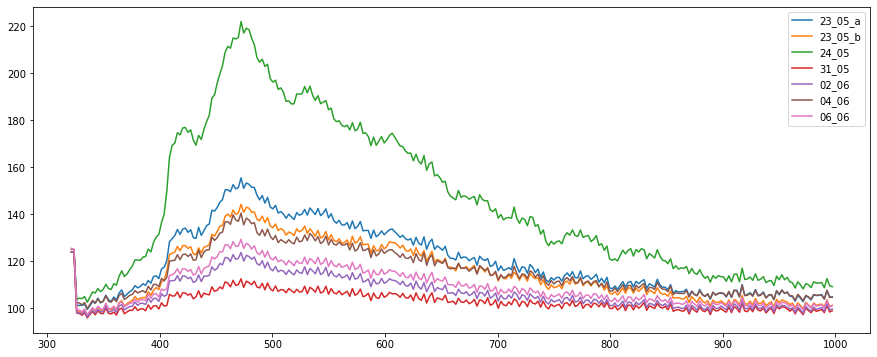

In [84]:
fig, ax1 = plt.subplots(figsize = (15, 6))

for i in range(len(esp)):
   plt.plot(wv, esp[i][:-1], label = names[i])
   plt.legend()


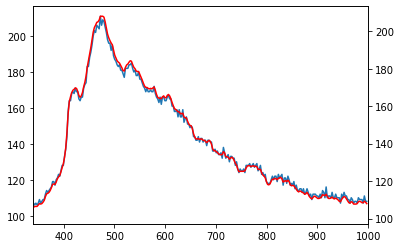

In [107]:
#FILTRO PASO BAJO PARA DATOS CON MUCHO RUIDO

b, a = scipy.signal.butter(1, 0.5,'lowpass')  
filtered = scipy.signal.filtfilt(b, a, esp_A[0][0][:-1])

[]

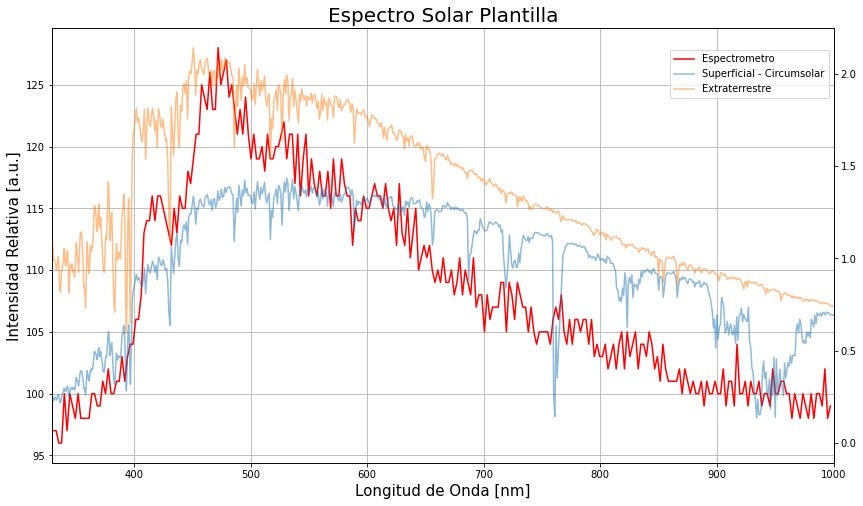

In [96]:
#Formato de Graficación de Espectros

fig, ax = plt.subplots(figsize = (14,8))

ax.plot(wv, esp_C[1][0:-1], 'r', label = 'Espectrometro')


ax2 = ax.twinx()
ax2.plot(solar_ref_sfc.wv, solar_ref_sfc.circumsolar, alpha = 0.5, label = 'Superficial - Circumsolar')
ax2.plot(solar_ref_sfc.wv, solar_ref_sfc.etr, alpha = 0.5, label = 'Extraterrestre')

ax.set_xlim(330, 1000)           #Rango de Respuesta Espectral del dispositivo
ax.set_xlabel('Longitud de Onda [nm]', size = 15), ax.set_ylabel('Intensidad Relativa [a.u.]', size = 15)
ax.set_title('Espectro Solar Plantilla', size = 20)


ax.grid()
fig.legend(loc = 'upper right', bbox_to_anchor = (0.9,0.85))


plt.plot()

**REFERNCES**

https://www.nrel.gov/grid/solar-resource/spectra-am1.5.html

https://www.astm.org/g0173-03r20.html

Ventusky nubosidad historico

Quantification of the Impact of Fine Particulate Matter on Solar Energy Resources and Energy Performance of Different Photovoltaic Technologies

Estimation of Daily Ground-Received Global Solar Radiation Using Air Pollutant Data
https://www.frontiersin.org/articles/10.3389/fpubh.2022.860107/full